In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample customer support FAQ data
faq_data = {
    "questions": [
        "How do I reset my password?",
        "What are your customer support hours?",
        "Where is my order?",
        "How do I return a product?",
        "Can I change my shipping address?",
        "How do I track my shipment?",
        "What payment methods do you accept?",
        "How do I contact customer service?",
        "Do you offer international shipping?",
        "How can I cancel my order?"
    ],
    "answers": [
        "To reset your password, go to the login page and click on 'Forgot Password'.",
        "Our customer support is available 24/7 via chat and email.",
        "You can track your order using the tracking link sent to your email.",
        "To return a product, please visit our returns page and follow the instructions.",
        "You can change your shipping address from your account settings before the order is shipped.",
        "Track your shipment through the link provided in your confirmation email.",
        "We accept all major credit cards, PayPal, and Apple Pay.",
        "You can contact customer service via our live chat or call our support number.",
        "Yes, we offer international shipping to select countries.",
        "To cancel your order, go to your orders page and click 'Cancel Order'."
    ]
}

# Create DataFrame
faq_df = pd.DataFrame(faq_data)
faq_df.head()


,questions,answers
0,How do I reset my password?,"To reset your password, go to the login page a..."
1,What are your customer support hours?,Our customer support is available 24/7 via cha...
2,Where is my order?,You can track your order using the tracking li...
3,How do I return a product?,"To return a product, please visit our returns ..."
4,Can I change my shipping address?,You can change your shipping address from your...


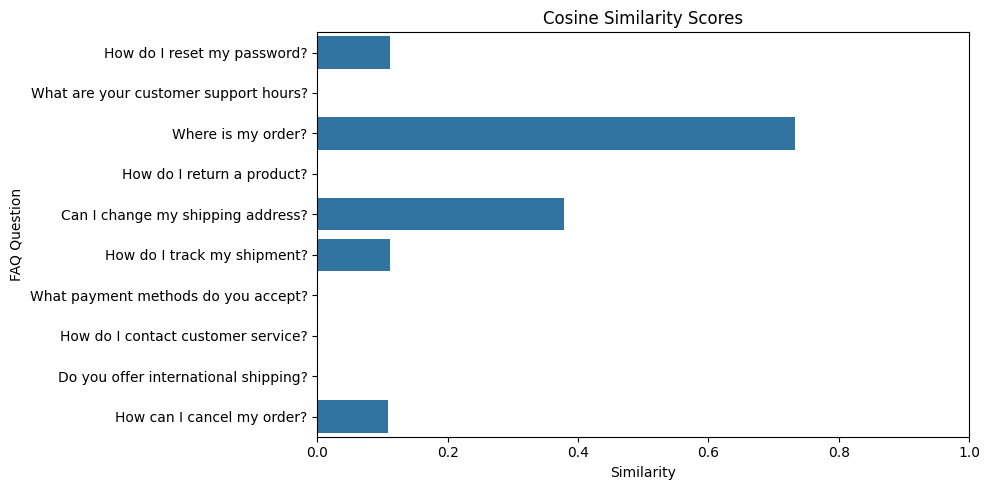

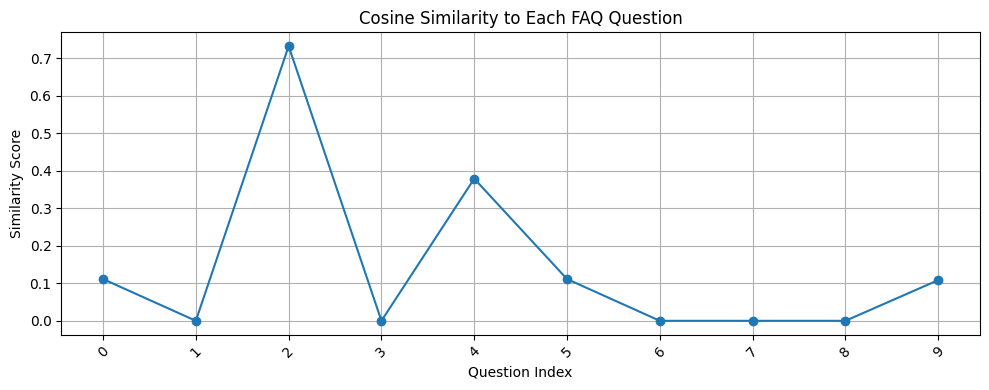

User Query: I want to change where my package is delivered
Bot Response: You can track your order using the tracking link sent to your email.


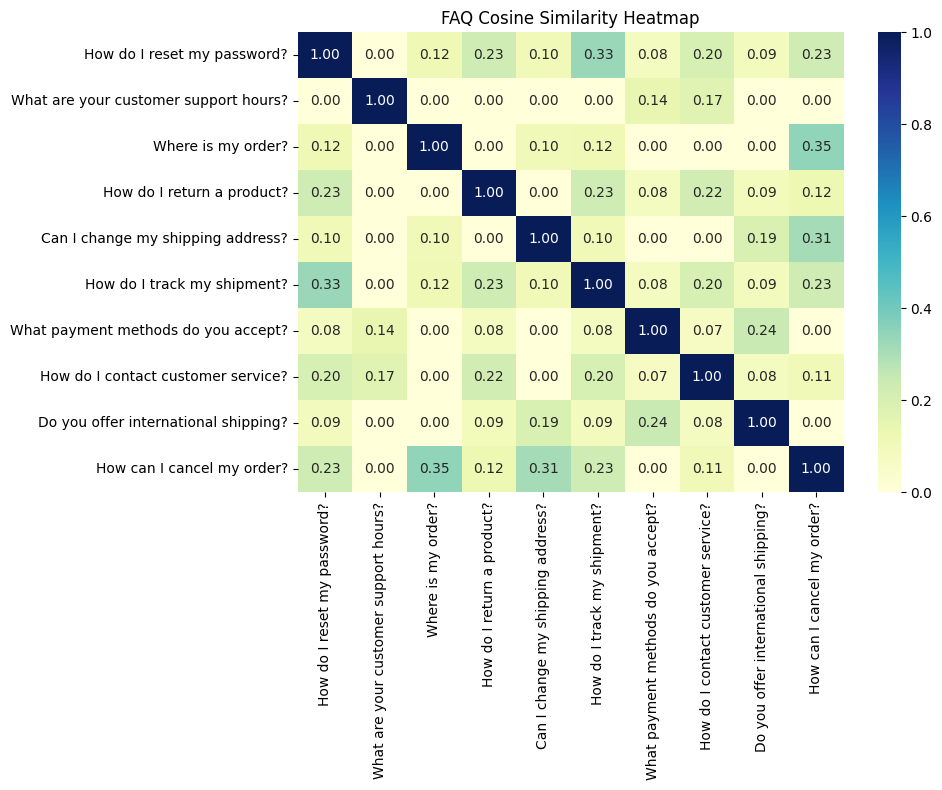

In [2]:
# 📦 Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ✅ Sample FAQ dataset
faq_data = {
    "questions": [
        "How do I reset my password?",
        "What are your customer support hours?",
        "Where is my order?",
        "How do I return a product?",
        "Can I change my shipping address?",
        "How do I track my shipment?",
        "What payment methods do you accept?",
        "How do I contact customer service?",
        "Do you offer international shipping?",
        "How can I cancel my order?"
    ],
    "answers": [
        "To reset your password, go to the login page and click on 'Forgot Password'.",
        "Our customer support is available 24/7 via chat and email.",
        "You can track your order using the tracking link sent to your email.",
        "To return a product, please visit our returns page and follow the instructions.",
        "You can change your shipping address from your account settings before the order is shipped.",
        "Track your shipment through the link provided in your confirmation email.",
        "We accept all major credit cards, PayPal, and Apple Pay.",
        "You can contact customer service via our live chat or call our support number.",
        "Yes, we offer international shipping to select countries.",
        "To cancel your order, go to your orders page and click 'Cancel Order'."
    ]
}

faq_df = pd.DataFrame(faq_data)

# 🧠 Vectorize FAQ questions using TF-IDF
vectorizer = TfidfVectorizer()
faq_vectors = vectorizer.fit_transform(faq_df["questions"])

# 🤖 Define chatbot function
def chatbot_response(user_input):
    user_vec = vectorizer.transform([user_input])
    similarity_scores = cosine_similarity(user_vec, faq_vectors).flatten()

    # Visualization 1: Bar Chart of Similarity Scores
    plt.figure(figsize=(10, 5))
    sns.barplot(x=similarity_scores, y=faq_df["questions"])
    plt.title("Cosine Similarity Scores")
    plt.xlabel("Similarity")
    plt.ylabel("FAQ Question")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

    # Visualization 2: Cosine Similarity Line Plot
    plt.figure(figsize=(10, 4))
    plt.plot(similarity_scores, marker='o')
    plt.title("Cosine Similarity to Each FAQ Question")
    plt.xlabel("Question Index")
    plt.ylabel("Similarity Score")
    plt.xticks(np.arange(len(faq_df)), rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Find best match
    best_match_idx = np.argmax(similarity_scores)
    return faq_df["answers"][best_match_idx], similarity_scores

# 🔍 Try the chatbot
user_query = "I want to change where my package is delivered"
response, scores = chatbot_response(user_query)
print("User Query:", user_query)
print("Bot Response:", response)

# Visualization 3: Heatmap of Similarity Scores Matrix
similarity_matrix = cosine_similarity(faq_vectors)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=faq_df["questions"], yticklabels=faq_df["questions"], cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("FAQ Cosine Similarity Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
